<a href="https://colab.research.google.com/github/OmkarPatkar/machine-learning/blob/main/ThresholdValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Select the Right Threshold values using ROC Curve**

In [72]:
# Load Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

In [73]:
# Create dataset

x, y = make_classification(n_samples = 2000, n_classes = 2, weights = [1,1], random_state = 0) 

In [74]:
# Shape of the data

x.shape

(2000, 20)

In [75]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [76]:
# Split the data for model building

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Random Forest

In [77]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
ytrain_pred = rf_model.predict_proba(x_train)
ytest_pred = rf_model.predict_proba(x_test)
print(f'RF train roc-auc: {roc_auc_score(y_train, ytrain_pred[:,1])}')
print(f'RF test roc-auc: {roc_auc_score(y_test, ytest_pred[:,1])}')

RF train roc-auc: 1.0
RF test roc-auc: 0.9970578420467185


In [78]:
# We get 2 columns so we choose any one column thats why we take[:,1] in above step
ytrain_pred

array([[0.  , 1.  ],
       [0.04, 0.96],
       [0.  , 1.  ],
       ...,
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.02, 0.98]])

# Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
ytrain_pred = lr_model.predict_proba(x_train)
ytest_pred = lr_model.predict_proba(x_test)
print(f'LR train roc-auc: {roc_auc_score(y_train, ytrain_pred[:,1])}')
print(f'LR test roc-auc: {roc_auc_score(y_test, ytest_pred[:,1])}')

LR train roc-auc: 0.9964540599686439
LR test roc-auc: 0.9949054505005561


# Adaboost Classifier

In [80]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
ytrain_pred = ada.predict_proba(x_train)
ytest_pred = ada.predict_proba(x_test)
print(f'ADA train roc-auc: {roc_auc_score(y_train, ytrain_pred[:,1])}')
print(f'ADA test roc-auc: {roc_auc_score(y_test, ytest_pred[:,1])}')

ADA train roc-auc: 1.0
ADA test roc-auc: 0.993515016685206


# KNNClassifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
ytrain_pred = knn.predict_proba(x_train)
ytest_pred = knn.predict_proba(x_test)
print(f'KNN train roc-auc: {roc_auc_score(y_train, ytrain_pred[:,1])}')
print(f'KNN test roc-auc: {roc_auc_score(y_test, ytest_pred[:,1])}')

KNN train roc-auc: 0.9989109044290567
KNN test roc-auc: 0.9934260289210235


# Now we will focus on selecting the best threshold for maximum accuracy

In [82]:
# Create an array then store predicted values from all the models in the array and get the roc_auc_score 

pred = []
for model in [rf_model, lr_model, ada, knn]:
  pred.append(pd.Series(model.predict_proba(x_test)[:,1]))

final_prediction = pd.concat(pred, axis = 1).mean(axis = 1)
print(f'Ensemble test roc auc: {roc_auc_score(y_test, final_prediction)}')

Ensemble test roc auc: 0.9959399332591768


In [83]:
final_prediction

0      0.899539
1      0.069676
2      0.081214
3      0.933734
4      0.821480
         ...   
595    0.897821
596    0.132358
597    0.183100
598    0.070095
599    0.839523
Length: 600, dtype: float64

# Calculate the ROc Curve


In [84]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.94193923, 0.94193923, 0.63630609, 0.56985102, 0.52536415,
       0.13816325, 0.13745243, 0.08217812, 0.08202678, 0.0796917 ,
       0.07960453, 0.04386891])

Now we have multiple threshold values, we need to select a best threshold value out of it.

In [85]:
from sklearn.metrics import accuracy_score

# We loop through the threshold values and if the value is greater than final_prediction value then we consider it as 1 else 0
# then we check for accuracy score and normalize it

accuracy_ls = []
for thres in thresholds:
  y_pred = np.where(final_prediction > thres, 1, 0)
  accuracy_ls.append(accuracy_score(y_test, y_pred, normalize = True))

# Here we create the dataframe

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis = 1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by = 'accuracy', ascending = False, inplace = True)
accuracy_ls.head()

,thresholds,accuracy
3,0.569851,0.991667
4,0.525364,0.991667
2,0.636306,0.990000
5,0.138163,0.953333
6,0.137452,0.951667


In [86]:
# Plot of ROC_CURVE

def plot_roc_curve(fpr, tpr):
  plt.figure(figsize=(15, 10))
  plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
  plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

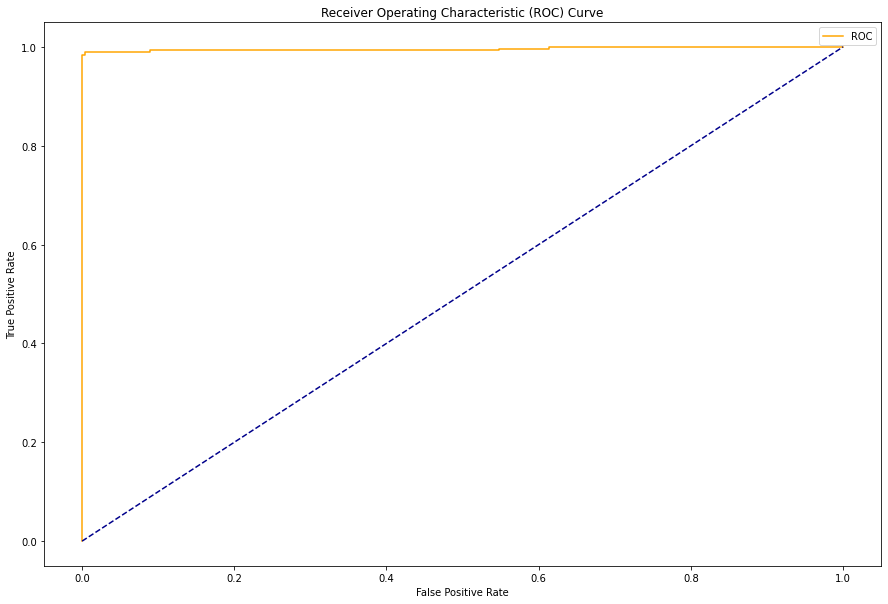

In [87]:
plot_roc_curve(fpr, tpr)